# **Análisis exploratorio de los datos** 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el conjunto de datos Titanic-Dataset.csv en un dataframe de pandas
df_titanic = pd.read_csv('datasets/Titanic-Dataset.csv')

# Mostrar las primeras filas del dataframe
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Examinar la forma del conjunto de datos
print("Forma del conjunto de datos:", df_titanic.shape)

Forma del conjunto de datos: (891, 12)


In [8]:
# Examinar los tipos de datos
print("Tipos de datos:")
print(df_titanic.dtypes)

Tipos de datos:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [9]:
# Examinar los valores faltantes
print("Valores faltantes:")
print(df_titanic.isnull().sum())

Valores faltantes:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Contar los valores únicos
print("Recuentos únicos:")
print(df_titanic.nunique())

Recuentos únicos:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [12]:
# Analizando los tipos de variables (features)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


clasificación de los tipos de datos `categóricos` o `numéricos` y los subdivide en `nominales`, `ordinales`, `discretos` y `continuos`

| **Variable**  | **Tipo**       | **Subclasificación** |
|----------------|----------------|----------------------|
| PassengerId    | Numérico       | Discreto            |
| Survived       | Numérico       | Discreto            |
| Pclass         | Categórico     | Ordinal             |
| Name           | Categórico     | Nominal             |
| Sex            | Categórico     | Nominal             |
| Age            | Numérico       | Continuo            |
| SibSp          | Numérico       | Discreto            |
| Parch          | Numérico       | Discreto            |
| Ticket         | Categórico     | Nominal             |
| Fare           | Numérico       | Continuo            |
| Cabin          | Categórico     | Nominal             |
| Embarked       | Categórico     | Nominal             |


**Cantidades totales y estadísticas**
La idea en este punto es analizar las cantidades por separado, sin cruzar ninguna variable, para ir entendiendo poco a poco el contexto del conjunto de datos.

Para obtener una visión general de las estadísticas descriptivas de las variables numéricas y categóricas, utilizamos los métodos `describe()` y `describe(include=[object])`:

In [14]:
# Estadísticas descriptivas para datos numéricos
print("Estadísticas descriptivas para datos numéricos:")
display(df_titanic.describe())

# Estadísticas descriptivas para datos de tipo objeto
print("Estadísticas descriptivas para datos de tipo objeto:")
display(df_titanic.describe(include=[object]))

Estadísticas descriptivas para datos numéricos:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Estadísticas descriptivas para datos de tipo objeto:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [15]:
# Cantidad total de sobrevivientes (1) y fallecidos (0)
survival_counts = df_titanic['Survived'].value_counts()
print("Cantidad total de sobrevivientes (1) y fallecidos (0):")
print(survival_counts)

Cantidad total de sobrevivientes (1) y fallecidos (0):
Survived
0    549
1    342
Name: count, dtype: int64


In [16]:
# Cantidad total de pasajeros por ciudad de embarque
embarked_counts = df_titanic['Embarked'].value_counts()
print("Cantidad total de pasajeros por ciudad de embarque (C = Cherbourg, Q = Queenston, S = Southampton):")
print(embarked_counts)

Cantidad total de pasajeros por ciudad de embarque (C = Cherbourg, Q = Queenston, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [17]:
# Cantidad total de pasajeros por sexo
sex_counts = df_titanic['Sex'].value_counts()
print("Cantidad total de pasajeros por sexo:")
print(sex_counts)

Cantidad total de pasajeros por sexo:
Sex
male      577
female    314
Name: count, dtype: int64


In [18]:
# Cantidad total de pasajeros por clase
class_counts = df_titanic['Pclass'].value_counts()
print("Cantidad total de pasajeros por clase (1 = 1era clase, 2 = 2da clase, 3 = 3era clase):")
print(class_counts)

Cantidad total de pasajeros por clase (1 = 1era clase, 2 = 2da clase, 3 = 3era clase):
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


### **Conclusiones iniciales**

Cantidad total de sobrevivientes (1) y fallecidos (0):

Sobrevivientes: 342 (38%)
Fallecidos: 549 (61%)
Conclusión: La mayoría de los pasajeros no sobrevivieron al desastre.
Cantidad total de pasajeros por ciudad de embarque:

Southampton (S): 644 (72%)
Cherbourg (C): 168 (18%)
Queenstown (Q): 77 (8%)
Conclusión: La mayoría de los pasajeros embarcaron en Southampton.
Cantidad total de pasajeros por sexo:

Hombres: 577 (64%)
Mujeres: 314 (35%)
Conclusión: Había más hombres que mujeres a bordo del Titanic.
Cantidad total de pasajeros por clase:

1era clase: 216 (24%)
2da clase: 184 (20%)
3era clase: 491 (55%)
Conclusión: La mayoría de los pasajeros viajaban en 3era clase.

Estas conclusiones iniciales nos proporcionan una visión general del conjunto de datos y nos ayudan a entender mejor el contexto del desastre del Titanic.

### **Variables numéricas**  

Las variables numéricas, tanto discretas como continuas, permiten utilizar el método `describe()` para obtener estadísticas generales como la media, mediana, desviación estándar, valores máximos y mínimos, entre otros.  

Es importante señalar que, aunque variables como **`Survived`** y **`Pclass`** están almacenadas como valores numéricos, en realidad representan información categórica.  
- **`Survived`** indica si un pasajero sobrevivió o falleció, lo que la convierte en una variable categórica binaria.  
- **`Pclass`** indica la clase en la que viajaba el pasajero (1ª, 2ª o 3ª clase), que puede interpretarse como una variable categórica ordinal.  

Para facilitar ciertos procesos en Machine Learning, se han mantenido estos valores como numéricos en lugar de convertirlos a cadenas de texto. Esto evita tener que reconvertirlos a números más adelante para modelos que trabajan con datos numéricos.  

Por otro lado, la columna **`PassengerId`** contiene identificadores únicos para cada pasajero. Este valor no tiene relevancia desde una perspectiva analítica o predictiva, ya que no aporta información significativa sobre los pasajeros más allá de identificarlos individualmente.  

In [23]:
# Calcular el porcentaje de supervivencia por sexo
porcentaje_supervivencia_sexo = df_titanic[['Sex', 'Survived']].groupby('Sex').mean() * 100

# Mostrar el resultado
print(porcentaje_supervivencia_sexo)

         Survived
Sex              
female  74.203822
male    18.890815


In [24]:
# Crear la tabla cruzada con márgenes
tabla_cruzada = pd.crosstab(index=df_titanic.Survived, columns=df_titanic.Sex, margins=True)

# Mostrar el resultado
print(tabla_cruzada)

Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891


In [25]:
# Porcentaje total de pasajeros por sexo
porcentaje_sexo = df_titanic['Sex'].value_counts() * 100 / df_titanic.shape[0]

# Mostrar el resultado
print(porcentaje_sexo)

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


1. **Promedio de edad:** El promedio de edad de los pasajeros era de **28 años**, lo que indica que la mayoría de los pasajeros eran adultos jóvenes.  
2. **Viajes individuales:** Más del **50% de los pasajeros** viajaba solo, sin familiares o acompañantes directos. Esto puede influir en la probabilidad de supervivencia, ya que los lazos familiares podrían haber afectado las decisiones durante la evacuación.

### Análisis cruzado de variables y gráficos

Para profundizar en el análisis, comenzamos a relacionar variables clave mediante gráficos y estadísticas. Esto nos permitirá evaluar supuestos relacionados con la supervivencia, las características demográficas de los pasajeros y las posibles correlaciones entre estas variables.

#### Relación entre el sexo y la supervivencia
Al calcular el porcentaje promedio de supervivencia según el sexo, encontramos que:  
- **74% de las mujeres** sobrevivieron.  
- **18% de los hombres** sobrevivieron.  

Esto evidencia una marcada diferencia en las tasas de supervivencia según el género. Sin embargo, surge la pregunta: ¿había una distribución equilibrada entre hombres y mujeres en el barco?  

#### Distribución por género:
Utilizando una tabla de contingencia:  

| **Survived** | **female** | **male** | **All** |
|--------------|------------|----------|---------|
| 0            | 81         | 468      | 549     |
| 1            | 233        | 109      | 342     |
| **All**      | 314        | 577      | 891     |

- De los 891 pasajeros, **577 eran hombres** (65%) y **314 eran mujeres** (35%).  
- Aunque más mujeres sobrevivieron en términos relativos, en números absolutos había casi el doble de hombres en el barco.  
- Esto sugiere que, dada la predominancia masculina en la población, la probabilidad de fallecimiento era significativamente mayor para los hombres.  

#### Proporción total de pasajeros por género:
El desglose de pasajeros por género en porcentaje confirma que:  
- **65% hombres**.  
- **35% mujeres**.

Recopilando información del área de trabajo

Aquí tienes una tabla en Markdown que clasifica los tipos de datos en categóricas y numéricas, junto con sus subclasificaciones:

| Tipo de Dato | Subclasificación | Columna     |
|--------------|------------------|-------------|
| Numérico     | Discreto         | PassengerId |
|              | Discreto         | Survived    |
|              | Discreto         | Pclass      |
|              | Discreto         | SibSp       |
|              | Discreto         | Parch       |
|              | Continuo         | Age         |
|              | Continuo         | Fare        |
| Categórico   | Nominal          | Name        |
|              | Nominal          | Sex         |
|              | Nominal          | Ticket      |
|              | Nominal          | Cabin       |
|              | Nominal          | Embarked    |

C:\Users\Pc\AppData\Local\Temp\ipykernel_4528\3440394636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df_titanic, palette="Set3")


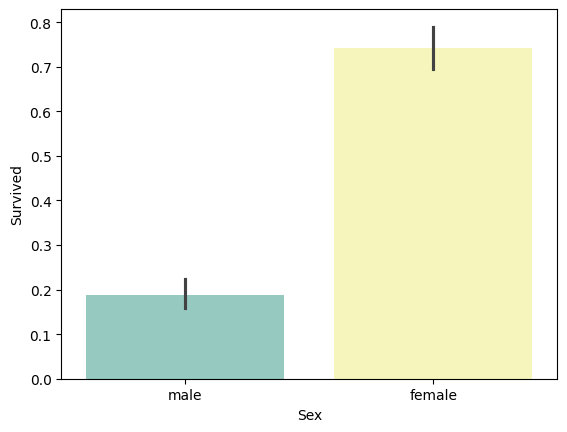

In [30]:
# Crear el gráfico de barras con colores profesionales
sns.barplot(x="Sex", y="Survived", data=df_titanic, palette="Set3")

# Mostrar el gráfico
plt.show()

Podemos notar que la distribución de edades para ambos sexos es bastante similar. El rango promedio de edad se encuentra entre los **27 y 30 años**, con un valor máximo de **80 años** registrado en el grupo masculino.  

A continuación, utilizaremos un gráfico de tipo *catplot* para visualizar cómo se relacionan la edad, el sexo y la supervivencia de los pasajeros.  

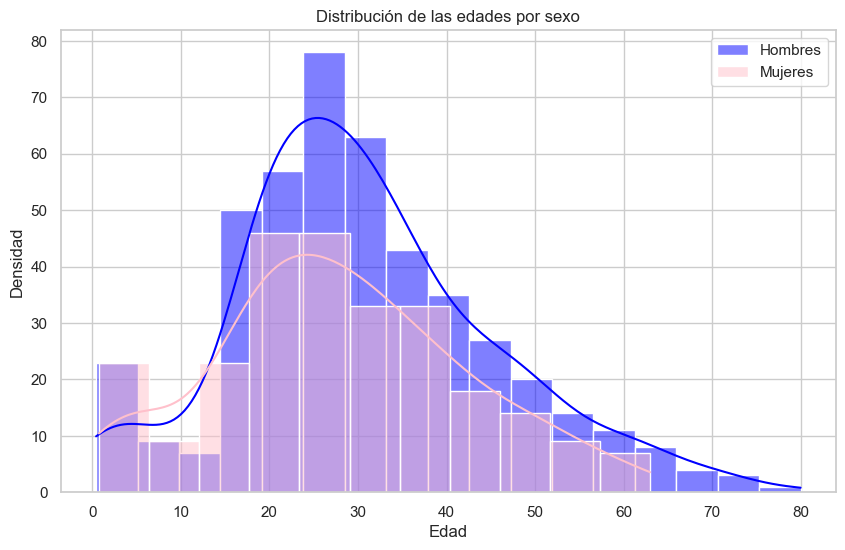

In [33]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de distribución de edades por sexo
plt.figure(figsize=(10, 6))
sns.histplot(df_titanic[df_titanic.Sex == 'male'].Age, label='Hombres', color='blue', kde=True)
sns.histplot(df_titanic[df_titanic.Sex == 'female'].Age, label='Mujeres', color='pink', kde=True)

# Añadir título y etiquetas
plt.title('Distribución de las edades por sexo')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()

# Mostrar el gráfico
plt.show()

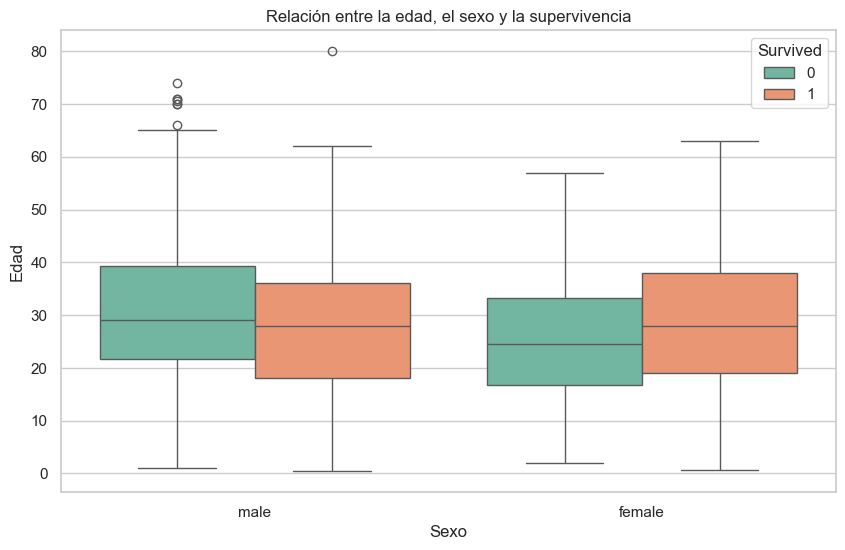

In [37]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico boxplot para mostrar la relación entre la edad, el sexo y la supervivencia
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_titanic, y="Age", x="Sex", hue="Survived", palette="Set2")

# Añadir título y etiquetas
plt.title('Relación entre la edad, el sexo y la supervivencia')
plt.xlabel('Sexo')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

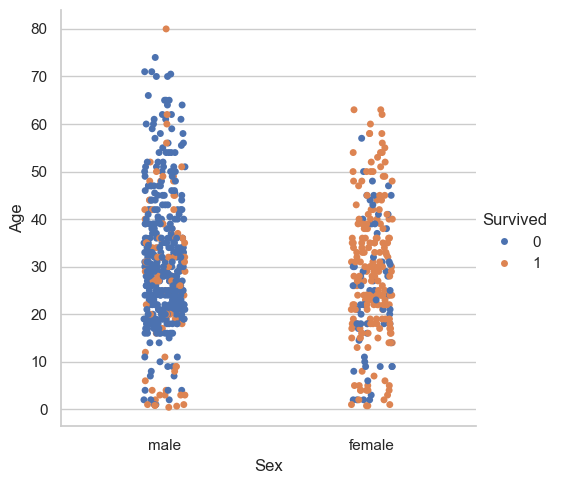

In [36]:
sns.catplot(data=df_titanic, y="Age",x="Sex",hue="Survived")

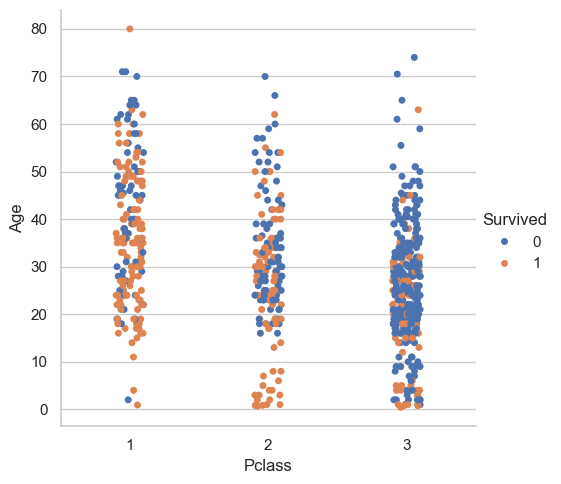

In [40]:
sns.catplot(data=df_titanic, y="Age",x="Pclass",hue="Survived")

<Axes: xlabel='Pclass', ylabel='Survived'>

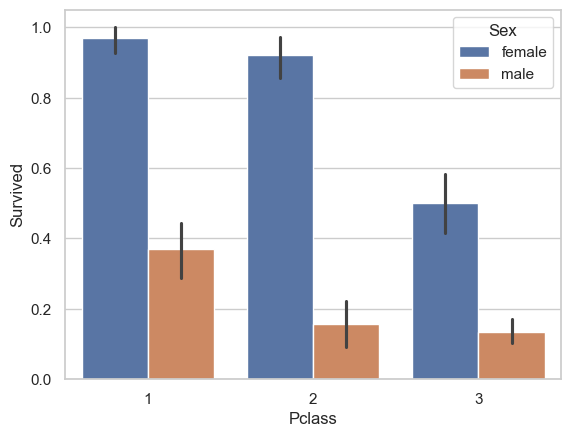

In [47]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df_titanic)

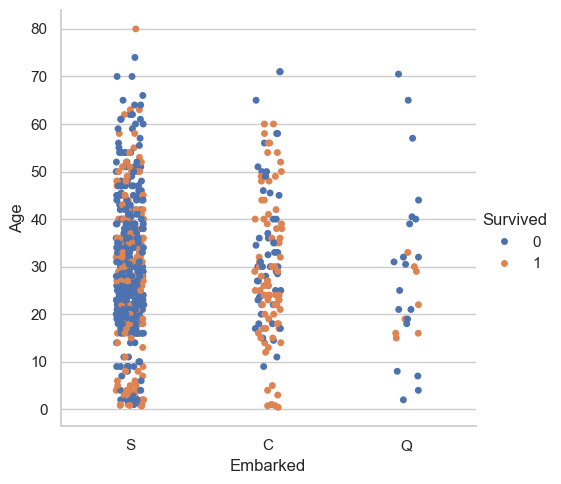

In [48]:
sns.catplot(data=df_titanic, y="Age",x="Embarked",hue="Survived")

Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [51]:
# Eliminar columnas irrelevantes
df_titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# Tratar valores faltantes
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

# Transformar variables categóricas
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})
df_titanic = pd.get_dummies(df_titanic, columns=['Embarked'], drop_first=True)

# Normalizar o escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_titanic[['Age', 'Fare']] = scaler.fit_transform(df_titanic[['Age', 'Fare']])

# Mostrar las primeras filas del dataframe preprocesado
print(df_titanic.head())

C:\Users\Pc\AppData\Local\Temp\ipykernel_4528\764394417.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
C:\Users\Pc\AppData\Local\Temp\ipykernel_4528\764394417.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565736      1      0 -0.502445       False   
1         1       1    1  0.663861      1      0  0.786845       False   
2         1       3    1 -0.258337      0      0 -0.488854       False   
3         1       1    1  0.433312      1      0  0.420730       False   
4         0       3    0  0.433312      0      0 -0.486337       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


Elimina las columnas PassengerId, Name, Ticket y Cabin que no son relevantes para el análisis.
Rellena los valores faltantes en la columna Age con la mediana y en la columna Embarked con el valor más frecuente.
Convierte la columna Sex en valores numéricos y crea variables dummy para la columna Embarked.
Normaliza las columnas Age y Fare utilizando StandardScaler.

In [52]:
# Examinar los valores faltantes
print("Valores faltantes:")
print(df_titanic.isnull().sum())

Valores faltantes:
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

Dividir el dataset en Train y Test para evaluar correctamente el modelo. 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Separar las características (X) y la variable objetivo (y)
X = df_titanic.drop(columns=['Survived'])
y = df_titanic['Survived']

# Utilizar un modelo de RandomForest para la selección de características
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Seleccionar características importantes
selector = SelectFromModel(clf, prefit=True)
X_important = selector.transform(X)

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (712, 3)
Dimensiones del conjunto de prueba: (179, 3)


c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Separar las características (X) y la variable objetivo (y)
X = df_titanic.drop(columns=['Survived'])
y = df_titanic['Survived']

# Utilizar un modelo de RandomForest para la selección de características
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Seleccionar características importantes
selector = SelectFromModel(clf, prefit=True)
X_important = selector.transform(X)

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Definir el modelo de Regresión Logística
log_reg = LogisticRegression()

# Definir los hiperparámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Entrenar el modelo con los diferentes hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores hiperparámetros encontrados:
{'C': 0.1, 'solver': 'saga'}
Precisión en el conjunto de prueba: 0.78


c:\Users\Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



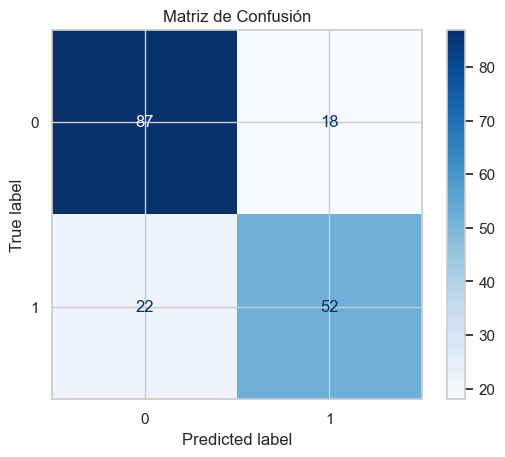

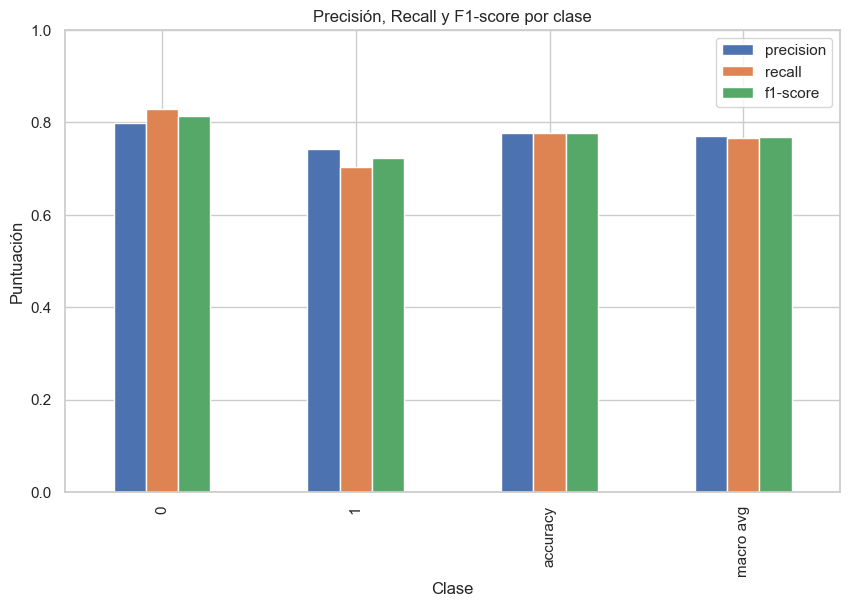

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar el desempeño del modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

# Gráfica de barras para precisión, recall y F1-score
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()

metrics_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(10, 6))
plt.title('Precisión, Recall y F1-score por clase')
plt.xlabel('Clase')
plt.ylabel('Puntuación')
plt.ylim(0, 1)
plt.show()

# **Interpretación y análisis de los resultados**

## **Reporte de clasificación**

El reporte de clasificación presenta las métricas de evaluación del modelo de **Regresión Logística** aplicado al conjunto de prueba. Las métricas incluyen precisión (precision), recall, F1-score y el soporte para cada clase. A continuación, se detallan los resultados:

### **Clase 0 (No sobrevivió)**
- **Precisión**: 0.80  
- **Recall**: 0.83  
- **F1-score**: 0.81  
- **Soporte**: 105  

### **Clase 1 (Sobrevivió)**
- **Precisión**: 0.74  
- **Recall**: 0.70  
- **F1-score**: 0.72  
- **Soporte**: 74  

### **Métricas globales**
- **Precisión general**: 0.78  
- **Macro promedio**:  
  - **Precisión**: 0.77  
  - **Recall**: 0.77  
  - **F1-score**: 0.77  
- **Promedio ponderado**:  
  - **Precisión**: 0.78  
  - **Recall**: 0.78  
  - **F1-score**: 0.78  

## **Análisis de los resultados**

1. **Precisión**:  
   La precisión global del modelo es del **78%**, lo que indica que el modelo clasifica correctamente el 78% de las observaciones en el conjunto de prueba.  
   - Para la **clase 0 (No sobrevivió)**, la precisión es del **80%**, lo que implica que el modelo comete pocos falsos positivos al predecir que alguien no sobrevivió.  
   - Para la **clase 1 (Sobrevivió)**, la precisión es del **74%**, lo que refleja una menor confianza en las predicciones positivas.

2. **Recall**:  
   El **recall** mide la capacidad del modelo para identificar correctamente las instancias de una clase:  
   - Para la **clase 0 (No sobrevivió)**, el recall es del **83%**, lo que significa que el modelo identifica correctamente la mayoría de los pasajeros que no sobrevivieron.  
   - Para la **clase 1 (Sobrevivió)**, el recall es del **70%**, lo que indica que el modelo pierde una parte de los pasajeros que realmente sobrevivieron (falsos negativos).

3. **F1-score**:  
   El **F1-score** combina precisión y recall en una sola métrica.  
   - Para la **clase 0 (No sobrevivió)**, el F1-score es **0.81**, lo que confirma que el modelo tiene un alto desempeño en esta clase.  
   - Para la **clase 1 (Sobrevivió)**, el F1-score es **0.72**, lo cual es inferior debido a la menor capacidad del modelo para identificar correctamente a los pasajeros que sobrevivieron.

4. **Soporte**:  
   El soporte indica la cantidad de casos reales en cada clase:  
   - **105** pasajeros no sobrevivieron.  
   - **74** pasajeros sobrevivieron.  

El desbalance en el soporte (más pasajeros que no sobrevivieron) puede influir en el desempeño del modelo, explicando por qué las métricas son más altas para la clase mayoritaria (clase 0).

## **Documentación de los resultados**

El modelo de **Regresión Logística** muestra un desempeño global aceptable con una precisión del **78%**. Las métricas indican que el modelo es más efectivo para predecir correctamente a los pasajeros que **no sobrevivieron** (clase 0) en comparación con los que sí sobrevivieron (clase 1).  

- El **F1-score** más alto en la clase 0 sugiere que el modelo es más robusto para identificar los pasajeros que no sobrevivieron, con menor riesgo de falsos positivos y falsos negativos.  
- En contraste, la **clase 1** presenta un F1-score más bajo, lo cual revela un área de mejora en la detección de los pasajeros que sobrevivieron.

## **Conclusiones**

1. El modelo de **Regresión Logística** predice la supervivencia de los pasajeros del Titanic con una precisión general del **78%**.  
2. El desempeño del modelo es notablemente mejor para identificar a los pasajeros que **no sobrevivieron** (clase 0).  
3. El menor desempeño en la clase 1 (sobrevivientes) indica la necesidad de mejorar la capacidad del modelo para detectar pasajeros sobrevivientes.  